In [84]:
import cv2 as cv
import skimage.io as io
from skimage.color import rgb2gray
from skimage.feature import canny

from skimage.draw import rectangle
import matplotlib.pyplot as plt
import numpy as np
import imutils
import math
import cv2
import imutils
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize,thin
from commonFunctions import show_images


In [85]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


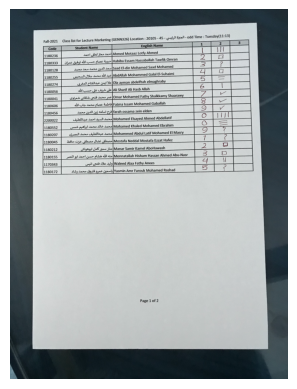

In [86]:
# img = cv2.imread('2.jpg')
img = cv2.imread('1.jpg')
# img = io.imread('1.jpg')[...,:3]
image =img
# io.imshow(image)
# cv2.imshow("original image", image)
# cv2.waitKey(0)
show_images([image],[''])

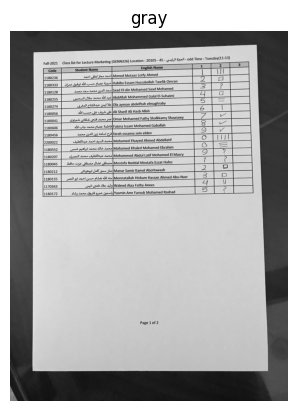

In [87]:
gray =(rgb2gray(image)*255).astype(np.uint8)
show_images([gray],['gray'])

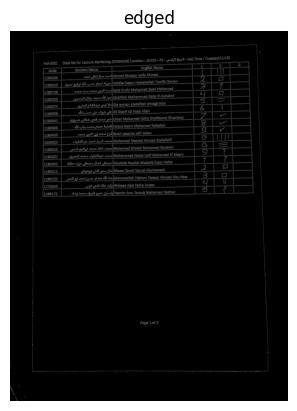

True

In [88]:
edged = cv2.Canny(gray, 100, 200) 
# edged = cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
# cv2.imshow("edged image", edged)
# cv2.waitKey(0)
show_images([edged],['edged'])
cv2.imwrite('edged.jpg',edged)

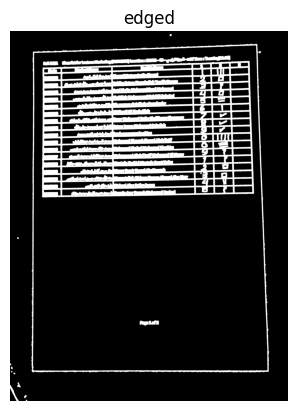

In [89]:
kernel = np.ones((5,5),np.uint8)
edged = cv2.dilate(edged,kernel,iterations = 3)
show_images([edged],['edged'])

(13,)


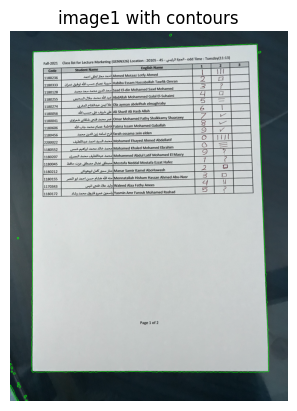

True

In [90]:
# cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts,new = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(np.shape(cnts))
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
show_images([image1],['image1 with contours'])
cv2.imwrite('contours.jpg',image1)

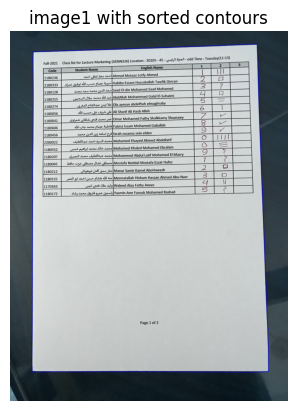

In [91]:
# c = max(cnts, key = cv2.contourArea)
# print(c)
# print("___________________________")
sortedcnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:1]
# print(sortedcnts[0])
# # screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,sortedcnts,-1,(0,0,255),3)
cv2.imwrite('contours2.jpg',image2)
show_images([image2],['image1 with sorted contours'])

In [92]:
peri = cv2.arcLength(sortedcnts[0], True)
approx = cv2.approxPolyDP(sortedcnts[0], 0.015 * peri, True)
print(len(approx))

4


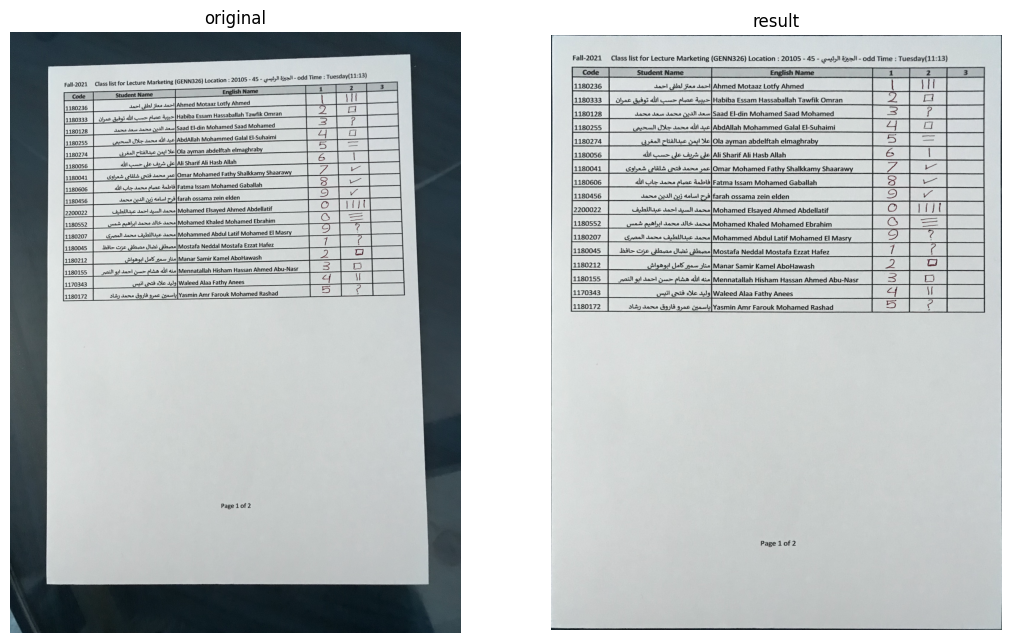

In [93]:
# Locate points of the documents
# or object which you want to transform
x,y,w,h = cv2.boundingRect(sortedcnts[0]) 
pts1 = np.float32([approx[1][0],approx[0][0],approx[2][0],approx[3][0]])
pts2 = np.float32([[0,0],[x+w,0],[0,y+h],[x+w,y+h]])

    
# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(image, matrix, (x+w, y+h))
# print(np.max(result))
# Wrap the transformed image
# cv2.imshow('frame', image) # Initial Capture
# cv2.imshow('frame1', result) # Transformed Capture
show_images([image,result],['original','result'])

In [94]:
# x,y,w,h = cv2.boundingRect(sortedcnts[0]) 
# print(x,y,w,h)
# new_img=image[y:y+h,x:x+w]
# # cv2.imwrite('./'b'.png',new_img)
# cv2.imshow("Top contour",new_img)
# cv2.waitKey(0)
# show_images([new_img],['image1 with sorted contours'])

In [95]:
# def biggest_contour(contours):
#     biggest = np.array([])
#     max_area = 0
#     max_perimeter = 0
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         peri = cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, 0.015 * peri, True)
#         if peri > max_perimeter and len(approx) == 4:
#             print(peri)
#             print('___________________________________________')
#             biggest = approx
#             max_area = area
#             max_perimeter = peri
#     return biggest

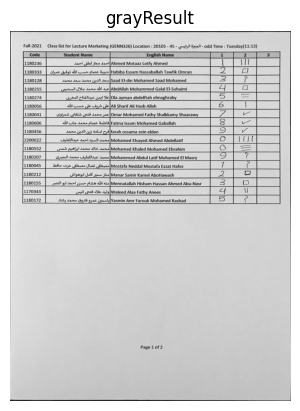

In [96]:
if(np.max(result)<=1):
    result = (result*255)
result = result.astype(np.uint8)
grayResult =rgb2gray(result)
# grayResult =(rgb2gray(result)).astype(np.uint16)

show_images([grayResult],['grayResult'])
grayResult = (grayResult*255).astype(np.uint8)

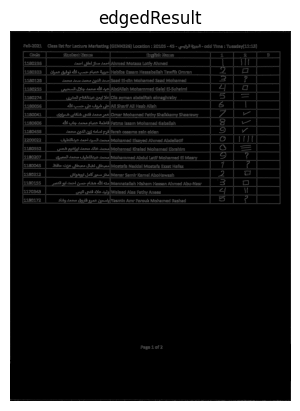

In [97]:
# ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# thresh1 = np.array(thresh1)
# io.imshow(thresh1)
# cv2.imshow("original image", thresh1)
# cv2.waitKey(0)
# slice1Copy = np.uint8(grayResult*255)

edgedResult = cv2.Canny(grayResult, 100, 200) 
# # edged = cv2.Sobel(gray_image, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
# cv2.imshow("edged image", edged)
# cv2.waitKey(0)
show_images([edgedResult],['edgedResult'])

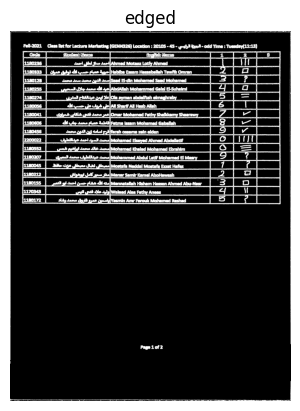

In [98]:
kernel = np.ones((5,5),np.uint8)
edged1 = cv2.dilate(edgedResult,kernel,iterations = 1)
show_images([edged1],['edged'])

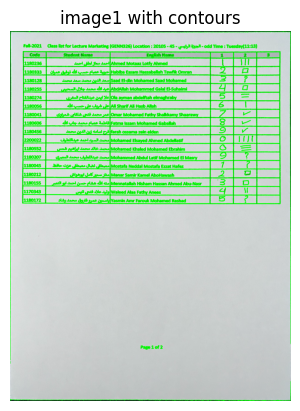

In [99]:
# cnts,new = cv2.findContours(thresh1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# image1=image2.copy()
# cv2.drawContours(image1,cnts,-1,(0,255,0),3)
# cv2.imshow("contours",image1)
# cv2.waitKey(0)
cnts,new = cv.findContours(edgedResult.copy(), cv2.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# print(np.shape(cnts))
Resutimage2=result.copy()
cv2.drawContours(Resutimage2,cnts,-1,(0,255,0),3)
show_images([Resutimage2],['image1 with contours'])
# cv2.imwrite('contours.jpg',Resutimage2)

In [100]:
i=0
print(np.shape(cnts))
arr = np.array([])
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) != 4: 
                arr=np.append(arr,i)
                # print(i)
        i=i+1
print('hhhh')
newCnts=np.delete(cnts,arr.astype(int))
print(np.shape(newCnts))

(3534,)
hhhh
(298,)


(298,)


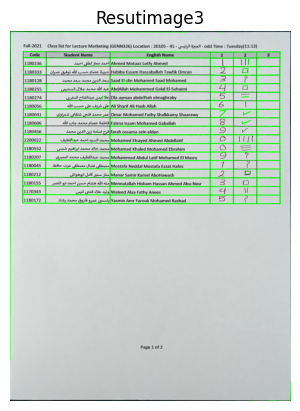

In [101]:
print(np.shape(newCnts))
Resutimage3=result.copy()
cv2.drawContours(Resutimage3,newCnts,-1,(0,255,0),3)
# cv2.imwrite("D:\image_project/abdozzzz.png", image1)

# cv2.imshow("contours",image1)
# cv2.waitKey(0)
show_images([Resutimage3],['Resutimage3'])


In [102]:
# import numpy as np


# for cnt in cnts:
#    x1,y1 = cnt[0][0]
#    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
#    if len(approx) == 4:
#       x, y, w, h = cv2.boundingRect(cnt)
#       ratio = float(w)/h
#       if ratio >= 0.9 and ratio <= 1.1:
#          image1 = cv2.drawContours(image1, [cnt], -1, (0,255,255), 3)
#          cv2.putText(image1, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
#       # else:
#       #    cv2.putText(image1, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
#       #    image1 = cv2.drawContours(image1, [cnt], -1, (0,255,0), 3)

# cv2.imshow("Shapes", image1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [103]:
text = pytesseract.image_to_string(img, lang="eng")    
print(text)

Fall-2021 Class list for Lecture Marketing (GENN326) Location : 20105 - 45 ~ yous 351 Bol - odd Time : Tuesday(11:13)

Student Name
dor! fla) fine tool Ahmed Motaaz Lotfy Ahmed

Habiba Essam Hassaballah Tawfik Omran

aces daw dare (pli nu] Saad El-din Mohamed Saad Mohamed

AbdAllah Mohammed Galal El-Suhaimi

cuits JS fou man waltah enageaty | L
Perera le

Tp shane cloner Mohamed Fthy Sabkamy Shearony | Z|
 diciraanepas ubifatra om Mohamed Gabon |
farah ossama zein elden aos
ate sntinatsane|ohamed sayedarmed sbiaiant | O
aspirate sns|ohamed MaledMohamedbahim |_|
Sposa ihtlne sa ohammed Adult Mohamed EiMasry |

APE
STayers

e
\\

—™
4

Mostafa Neddal Mostafa Ezzat Hafez Ries :
blgag:l Jo pow sie] Manar Samir Kamel AboHawash 4 |

Mennatallah Hisham Hassan Ahmed Abu-Nasr

Waleed Alaa Fathy Anees poze.
Yasmin Amr Farouk Mohamed Rashad base

ANS
Ae

Ol
fe

o

Page 1 of 2




In [104]:
# Locate points of the documents
    # or object which you want to transform
    pts1 = np.float32([[0, 260], [640, 260],
                       [0, 400], [640, 400]])
    pts2 = np.float32([[0, 0], [400, 0],
                       [0, 640], [400, 640]])
     
    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(frame, matrix, (500, 600))
     
    # Wrap the transformed image
    cv2.imshow('frame', frame) # Initial Capture
    cv2.imshow('frame1', result) # Transformed Capture

IndentationError: unexpected indent (2797962801.py, line 3)